# Hamburg -  a PV root top

In [1]:
# built-in python modules
import datetime
import inspect
import os

# scientific python add-ons
import numpy as np
import pandas as pd

# plotting stuff
# first line makes the plots appear in the notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl

# finally, we import the pvlib library
from pvlib import solarposition,irradiance,atmosphere,pvsystem
from pvlib.forecast import GFS, NAM, NDFD, RAP, HRRR

/home/tzech/Repo/pvlib-python/pvlib/forecast.py:19: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  'The forecast module algorithms and features are highly experimental. '


## Clean measurements

## Get irradiance forecasts

Use pvlib.forecast. Try to download previous times.

In [2]:
# Choose a location.
# Hamburg, Germany
latitude = 53.694540
longitude = 9.685330
tz = 'Europe/Berlin'

In [3]:
surface_tilt = 30
surface_azimuth = 90 # pvlib uses 0=North, 90=East, 180=South, 270=West convention
albedo = 0.2

In [4]:
start = pd.Timestamp(datetime.date.today(), tz=tz) - pd.Timedelta(days=40)
end = pd.Timestamp(datetime.date.today(), tz=tz) + pd.Timedelta(days=7)

In [5]:
# Define forecast model
fm = GFS()
#fm = NAM()
#fm = NDFD()
#fm = RAP()
#fm = HRRR()

Forecast properties

GFS 'full'

- Two time dimensions: reference and forecast; full access to all GRIB records
- Forecasts grids starting from the 0 hour forecast every 3 hours out to 10 days, then 12 hour forecasts for days 10-16.
- NCEP GFS Model : AWIPS 230 (G) Grid. Global Lat/Lon grid. Model runs at 0, 6, 12, and 18Z. Horizontal= 361 by 720 points, resolution 0.5 degree, Lat/Lon projection. Vertical= 1000 to 100 hPa mandatory pressure levels (10 levels); surface, height above ground, pressure layers.

GFS 'best'

- like GFS 'full', but: 
  Single time dimension: for each forecast time, use GRIB record with smallest offset from reference time

https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/catalog.html?dataset=grib/NCEP/GFS/Global_0p5deg/Best

In [6]:
# Retrieve data
forecast_data = fm.get_processed_data(latitude, longitude, start, end)

/home/tzech/Repo/pvlib-python/pvlib/forecast.py:447: UserWarning: Omitting parameters only_use_cftime_datetimes=False  and only_use_python_datetimes=True for older versions of netCDF4
  warnings.warn(("Omitting parameters only_use_cftime_datetimes=False "       " and only_use_python_datetimes=True for older versions of netCDF4"))


In [7]:
forecast_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 296 entries, 2020-05-27 00:00:00+02:00 to 2020-07-02 21:00:00+02:00
Data columns (total 9 columns):
temp_air        296 non-null float32
wind_speed      296 non-null float32
ghi             296 non-null float64
dni             296 non-null float64
dhi             296 non-null float64
total_clouds    296 non-null float32
low_clouds      296 non-null float32
mid_clouds      296 non-null float32
high_clouds     296 non-null float32
dtypes: float32(6), float64(3)
memory usage: 16.2 KB


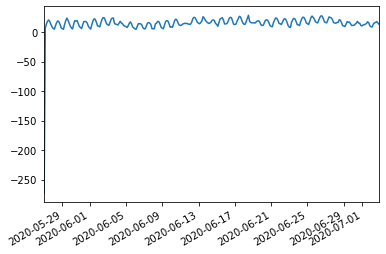

In [8]:
forecast_data['temp_air'].plot()

Text(0, 0.5, 'Irradiance ($W/m^{-2}$)')

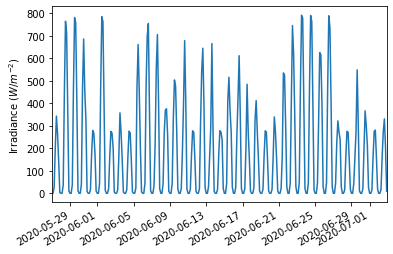

In [9]:
ghi = forecast_data['ghi']
ghi.plot()
plt.ylabel('Irradiance ($W/m^{-2}$)')

In [12]:
forecast_data.tail()

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2020-07-02 09:00:00+02:00,15.564545,2.366203,160.799632,2.022995,159.720515,100.0,91.0,93.0,67.0
2020-07-02 12:00:00+02:00,16.290283,2.813135,273.854169,14.486874,261.941371,100.0,95.0,91.0,66.0
2020-07-02 15:00:00+02:00,17.862305,3.578557,330.820958,26.627336,309.149141,88.0,87.0,1.0,67.0
2020-07-02 18:00:00+02:00,15.889923,4.354529,201.179612,24.985723,188.362650,83.0,59.0,0.0,70.0
2020-07-02 21:00:00+02:00,13.309723,3.626848,9.446569,0.000000,9.446569,100.0,91.0,0.0,95.0


In [15]:
#forecast_data.to_hdf('/home/tzech/data/weather/numerical_weather/gfs/uetersen_best_20200527-20200702.h5', 
#'best/20200527-20200702')

/home/tzech/anaconda3/envs/combi/lib/python3.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '20200527-20200702'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


In [16]:
df = pd.read_hdf('/home/tzech/data/weather/numerical_weather/gfs/uetersen_best_20200527-20200702.h5', 
                'best/20200527-20200702')

In [11]:
assert False

AssertionError: 

In [ ]:
fmFull = GFS(set_type='full')

In [ ]:
dfFull = fmFull.get_data(latitude, longitude, start, end, outformat='pandas')

In [ ]:
fm.get_data?

In [ ]:
ds = fmFull.get_data(latitude, longitude, start, end, outformat='xarray')

In [ ]:
ds